# Análise de custo de seguro de saúde
Autora: Dinorah de Farias Chagas, [linkedin](https://www.linkedin.com/in/dinorahfariasc/), [github](https://github.com/dinorahfariasc).

Neste projeto de Ciência de Dados, o foco está na análise e criação de modelos de regressão linear aplicados aos dados de seguro de saúde. O objetivo é entender os principais fatores que influenciam os custos do seguro e desenvolver modelos de previsão. Para isso vamos explorar o conjunto de dados, prepará-lo, e construir regressões lineares para estimar os preços dos seguros com base em variáveis como idade, sexo, índice de massa corporal e região. Este projeto é totalmente voltado para estudo afim de aprimorar minhas habilidades em análise de dados e modelagem preditiva, foi feito apartir do "Practice Project - Data Analytics for Insurance Cost Data Set" do curso [Data Analysis with Python - IBM](https://www.coursera.org/learn/data-analysis-with-python).

## Dados
o dataset utilizado para esse projeto será o [Medical Insurance dataset]('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv') que tem a seguinte estrutura:

| Parametro |Descrição | Tipo |
|---|----|---|
|age| Idade em anos| int |
|gender|Masculino ou Feminino|int (1 ou 2)|
| bmi | Índice de massa corporal | float |
|no_of_children| Número de filhos | int |
|smoker| se fuma ou não | int (0 ou 1)|
|region|Região do EUA - NO, NE, SO, SE | int (1,2,3 ou 4 respectivamente)| 
|charges| Valor anual do Seguro em USD | float|

### Para esse projeto temos como principais objetivos: 
* Realizar uma análise exploratória de dados (EDA) e identificar os atributos que mais influenciam os custos de um seguro de saúde.
* Desenvolver modelos de regressão linear com uma e multiplas variáveis para prever o custo.
* Usar Ridge Regression para refinar a peformance dos modelos da regressão linear.

### Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath, header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [51]:
headers = ['age','gender','bmi','no_of_children','smoker','region','charges']
df.columns = headers

In [13]:
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charger
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [8]:
df.describe()

,gender,bmi,no_of_children,region,charger
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,1.507215,30.701349,1.101732,2.559885,13261.369959
std,0.500038,6.129449,1.214806,1.130761,12151.768945
min,1.000000,15.960000,0.000000,1.000000,1121.873900
25%,1.000000,26.220000,0.000000,2.000000,4687.797000
50%,2.000000,30.447500,1.000000,3.000000,9333.014350
75%,2.000000,34.770000,2.000000,4.000000,16577.779500
max,2.000000,53.130000,5.000000,4.000000,63770.428010


In [53]:
df.replace("?",np.NaN,inplace=True) 

In [54]:
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19.0,1,27.900,0,1.0,3,16884.92
1,18.0,2,33.770,1,0.0,4,1725.55
2,28.0,2,33.000,3,0.0,4,4449.46
3,33.0,2,22.705,0,0.0,1,21984.47
4,32.0,2,28.880,0,0.0,1,3866.86
5,31.0,1,25.740,0,0.0,4,3756.62
6,46.0,1,33.440,1,0.0,4,8240.59
7,37.0,1,27.740,3,0.0,1,7281.51
8,37.0,2,29.830,2,0.0,2,6406.41
9,60.0,1,25.840,0,0.0,1,28923.14


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charger         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


## Preparação de dados
As colunas 'age' e 'smoker' não estão como valores númericos.

Como observado nos passos acima o dataset não estava com todos os dados, subistituimos os valores "?" por np.NaN, a ausência de dados acontece poucas vezes decidi lidar com os valores faltantes da seguinte forma:

- Para idade subistituir pela média geral. (media geral de acordo com a media de taxa)
- Para smoker, como é um atributo categorico vamos subistituir pelo valor mais frequênte.

Observa-se tambem que a coluna 'charges' tem os valores até a 5a casa decimal, reduziremos até a 2a.

In [18]:
df[['age','smoker']] = df[['age','smoker']].apply(pd.to_numeric) 

In [26]:
print(df[['age']].mean())
print(df[['smoker']].mode())

age    39.109827
dtype: float64
   smoker
0     0.0


In [28]:
df.describe()

,age,gender,bmi,no_of_children,smoker,region,charger
count,2768.000000,2772.000000,2772.000000,2772.000000,2765.000000,2772.000000,2772.000000
mean,39.109827,1.507215,30.701349,1.101732,0.203978,2.559885,13261.369959
std,14.091633,0.500038,6.129449,1.214806,0.403026,1.130761,12151.768945
min,18.000000,1.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,26.000000,1.000000,26.220000,0.000000,0.000000,2.000000,4687.797000
50%,39.000000,2.000000,30.447500,1.000000,0.000000,3.000000,9333.014350
75%,51.000000,2.000000,34.770000,2.000000,0.000000,4.000000,16577.779500
max,64.000000,2.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


In [30]:
df[['age']] = df[['age']].replace(np.NaN,39)
df[['smoker']] = df[['smoker']].replace(np.NaN,0)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   float64
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   float64
 5   region          2772 non-null   int64  
 6   charger         2772 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 151.7 KB


In [52]:
df[['charges']] = df[['charges']].round(2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19.0,1,27.900,0,1.0,3,16884.92
1,18.0,2,33.770,1,0.0,4,1725.55
2,28.0,2,33.000,3,0.0,4,4449.46
3,33.0,2,22.705,0,0.0,1,21984.47
4,32.0,2,28.880,0,0.0,1,3866.86


## EDA
na fase exploratoria de dados vamos tentar encontrar corelacoes entre a coluna 'charge' e outras variaveis. 

<Axes: >

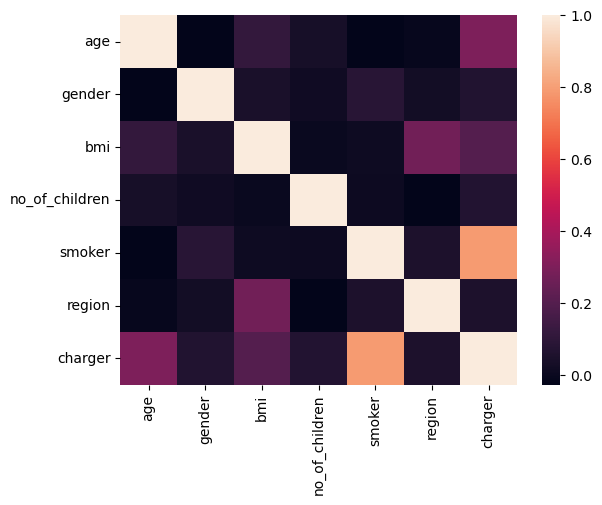

In [41]:
corr = df.corr()

sns.heatmap(corr)

como visto acima a maior correlacao existente ao analisar o atributo 'charger' são com os atributos 'smoker', 'age' e 'bmi'.

<Axes: xlabel='smoker', ylabel='charges'>

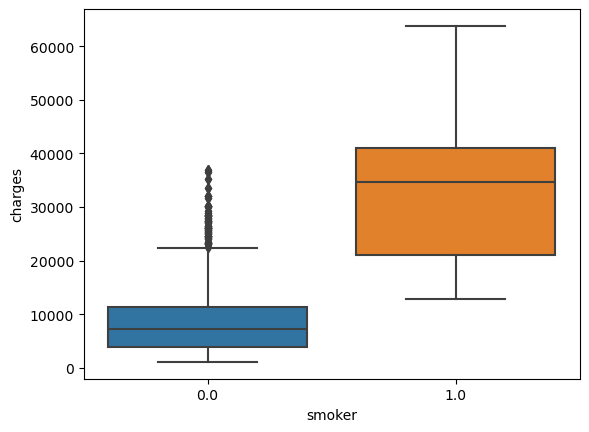

In [55]:
sns.boxplot(x='smoker', y='charges', data=df)

(0.0, 66902.85800000001)

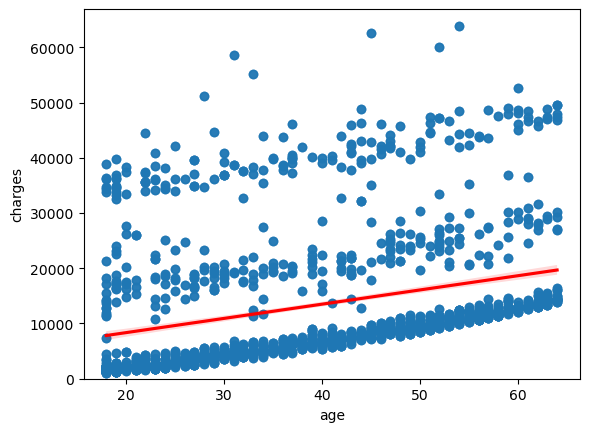

In [56]:
sns.regplot(x='age',y='charges', data=df, line_kws={'color':'red'})
plt.ylim(0,)

(0.0, 66902.85800000001)

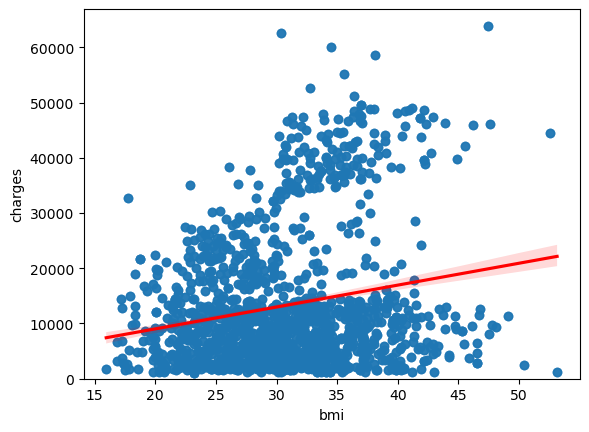

In [57]:
sns.regplot(x='bmi',y='charges', data=df, line_kws={'color':'red'})
plt.ylim(0,)

ao analisar os tres atributos que apresentam uma maior correlacao com nosso foco (o atributo 'charger') o atributo 'smoker' alem de ter a maior correlacao.

## Desenvolvimento de modelo


In [58]:
lm = LinearRegression()
x = df[['smoker']]
y = df[['charges']]
lm.fit(x,y)
print(lm.score(x,y))

0.6221791733924185


In [60]:
z = df[['age','gender','bmi','no_of_children','smoker','region']]
lm.fit(z,y)
print(lm.score(z,y))

0.7504083820289634


In [61]:
Input = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
z = z.astype(float)
pipe.fit(z,y)
ypipe = pipe.predict(z)
print(r2_score(y,ypipe))

0.8452541689899032


## Refinamento de modelo

Agora refinamos o modelo, separando dados para teste e treino do modelo, usando Ridge Regression e 

In [62]:
x_train,x_test, y_train, y_test = train_test_split(z,y, test_size=0.2, random_state =1)

In [63]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760807731582403


In [64]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr,y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7835631107608159
